<a href="https://colab.research.google.com/github/axshay007/Fake_news_prediction/blob/main/Fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the Dataset:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks whether the news article is real or fake:


    1: Fake news
    0: real News

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [155]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

printing the stopwords in English


In [156]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [157]:
#reading the data set
news_dataset = pd.read_csv('/content/train.csv')

In [158]:
# print first 5 rows
news_dataset.head() # print first 5 rows

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [159]:
news_dataset.shape

(20800, 5)

In [160]:
#checking the null values
news_dataset.isnull().sum() 

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [161]:
# replacing null value with empty string
news_dataset = news_dataset.fillna('') 

In [162]:
# merging to columns(title, author) and store in column(content) 
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [163]:
# droping columns(id,text,title,author0
news_dataset.drop(['id','text','title','author'],axis=1,inplace=True)

In [164]:
news_dataset.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


In [165]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [166]:
#news_dataset['content'] = news_dataset['content'].apply(str)

In [167]:
X = news_dataset.drop(columns='label', axis=1) #storing content column in x while droping label column
Y = news_dataset['label'] # storing label column in y 

In [168]:
print(X)
print(Y)

                                                 content
0      Darrell Lucus House Dem Aide: We Didn’t Even S...
1      Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2      Consortiumnews.com Why the Truth Might Get You...
3      Jessica Purkiss 15 Civilians Killed In Single ...
4      Howard Portnoy Iranian woman jailed for fictio...
...                                                  ...
20795  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797  Michael J. de la Merced and Rachel Abrams Macy...
20798  Alex Ansary NATO, Russia To Hold Parallel Exer...
20799            David Swanson What Keeps the F-35 Alive

[20800 rows x 1 columns]
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


**Process of reducing word to it's root word**

In [169]:
port_stem = PorterStemmer() 

In [170]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # ignoring other integer and all except alphabet
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [171]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [172]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


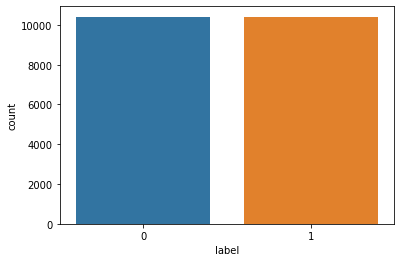

In [173]:
sns.countplot(x='label',data=news_dataset)

In [174]:
#separating the content and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [175]:
print(Y)

[1 0 1 ... 0 1 1]


In [176]:
Y.shape

(20800,)

In [177]:
# converting the textual data to numerical data...
# (becoz computer can only understand numerical value)
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X) 

**Regarding TfidfVectorizer :**

TF-IDF is a numerical statistic which measures the importance of the word or checks frequency of the word. 
      Term Frequency: Number of time a word appears in a text document(word that are imp coz more frequent and also relevant).
      Inverse Document Frequency: Measure the word is a rare word or common word in a document(word that are not imp coz more frequent but irrelevant).

In [178]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

**Splitting dataset into training and testing dataset**

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Here we are using logistic regression becoz it is used for segmentation and here we are segmenting news between real and fake.

In [180]:
model = LogisticRegression()

In [181]:
model.fit(X_train, Y_train)

LogisticRegression()

In [182]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [183]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9828846153846154


In [184]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [185]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9674038461538461


In [186]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [187]:
print(Y_test[3]) 
# here we are checking  the prediction of news  by matching label with predicted news
# if prediction and label value is same then our prediction is right 

1
